# Bandung House Price Prediction

## I got the dataset from rumah123.com using the web scrapping method (Selenium)

In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random as random

In [2]:
df = pd.read_csv('bandung_house_price_dataset_2023.csv')

df.head()

,namaproduk,harga,daerah,kamar,toilet,carport,luastanah,luasbangunan
0,Rumah Full Furnish Nyaman Terawat Dan Bagus di...,"Rp 8,5 Miliar","Dago, Bandung",9,10,0,534 m²,500 m²
1,Rumah murah bandung shm bebas banjir,Rp 274 Juta,"Bandung Kota, Bandung",2,1,1,72 m²,50 m²
2,Rumah Cantik Siap Huni Dalam Komplek Antapani ...,"Rp 2,2 Miliar","Antapani, Bandung",4,3,2,280 m²,214 m²
3,Rumah Terawat Nyaman Dan Aman di Komplek Pharm...,"Rp 1,8 Miliar","Bandung Kulon, Bandung",4,3,3,300 m²,200 m²
4,Rumah Di Resor Dago Pakar Bandung Utara Dago R...,"Rp 5,65 Miliar","Dago, Bandung",4,3,2,460 m²,450 m²


In [3]:
df1 = df.copy()

df1['city'] = df1['daerah'].apply(lambda x: x.split(', ')[1])

df1['subdistrict'] = df1['daerah'].apply(lambda x: x.split(', ')[0])

df1['sqm_living'] = df1['luastanah'].apply(lambda x: x.split(' m²')[0]).astype(int)

df1['sqm_lot'] = df1['luasbangunan'].apply(lambda x: x.split(' m²')[0]).astype(int)
df1['price'] = [0 for x in range (len(df))]


for i in df1.index:
    if "Juta" in df1['harga'][i]:
        df1['price'][i] = float(df1['harga'][i][3:].split(" Juta")[0].replace(',', '.'))*10**6
    else:
        df1['price'][i] = float(df1['harga'][i][3:].split(" Miliar")[0].replace(',', '.'))*10**9


df2 = df1.copy()
        
df2[:22]

C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_2148\2991317518.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price'][i] = float(df1['harga'][i][3:].split(" Miliar")[0].replace(',', '.'))*10**9
C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_2148\2991317518.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price'][i] = float(df1['harga'][i][3:].split(" Juta")[0].replace(',', '.'))*10**6


,namaproduk,harga,daerah,kamar,toilet,carport,luastanah,luasbangunan,city,subdistrict,sqm_living,sqm_lot,price
0,Rumah Full Furnish Nyaman Terawat Dan Bagus di...,"Rp 8,5 Miliar","Dago, Bandung",9,10,0,534 m²,500 m²,Bandung,Dago,534,500,8.500000e+09
1,Rumah murah bandung shm bebas banjir,Rp 274 Juta,"Bandung Kota, Bandung",2,1,1,72 m²,50 m²,Bandung,Bandung Kota,72,50,2.740000e+08
2,Rumah Cantik Siap Huni Dalam Komplek Antapani ...,"Rp 2,2 Miliar","Antapani, Bandung",4,3,2,280 m²,214 m²,Bandung,Antapani,280,214,2.200000e+09
3,Rumah Terawat Nyaman Dan Aman di Komplek Pharm...,"Rp 1,8 Miliar","Bandung Kulon, Bandung",4,3,3,300 m²,200 m²,Bandung,Bandung Kulon,300,200,1.800000e+09
4,Rumah Di Resor Dago Pakar Bandung Utara Dago R...,"Rp 5,65 Miliar","Dago, Bandung",4,3,2,460 m²,450 m²,Bandung,Dago,460,450,5.650000e+09
5,"Rumah Modern Minimalis di sayap Mekar Wangi , ...","Rp 1,1 Miliar","Mekar Wangi, Bandung",3,2,1,55 m²,82 m²,Bandung,Mekar Wangi,55,82,1.100000e+09
6,Rumah Minimalis View Danau di Kota Baru Parahy...,"Rp 6,4 Miliar","Kota Baru Parahyangan, Bandung",4,4,0,275 m²,300 m²,Bandung,Kota Baru Parahyangan,275,300,6.400000e+09
7,Dijual Rumah Baru Cluster Terbaru Tengah Kota ...,"Rp 1,1 Miliar","Leuwi Panjang, Bandung",3,2,0,55 m²,82 m²,Bandung,Leuwi Panjang,55,82,1.100000e+09
8,Rumah mewah dekat kota,Rp 636 Juta,"Kopo, Bandung",2,2,1,98 m²,70 m²,Bandung,Kopo,98,70,6.360000e+08
9,Rumah Minimalis Modern di komplek Elang Garu...,Rp 895 Juta,"Pajajaran, Bandung",3,3,1,39 m²,62 m²,Bandung,Pajajaran,39,62,8.950000e+08


Before we start to talk about the data further, first we can plot a heatmap to see the correlation between our columns (especially with the price column)

C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_2148\776197641.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df2.corr()


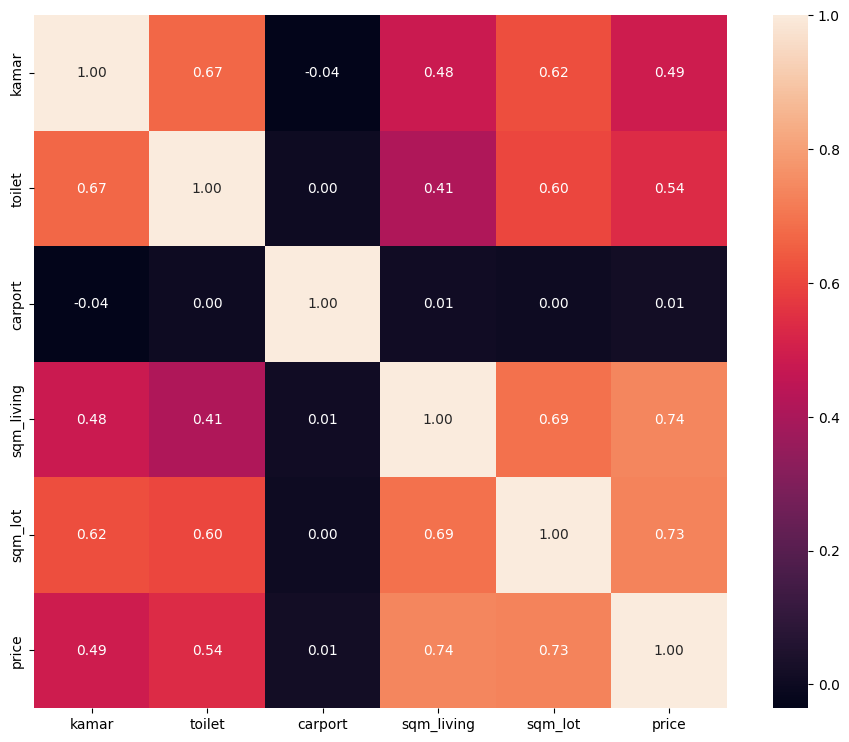

In [270]:
#correlation matrix
corrmat = df2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True, fmt='.2f',annot=True);

From the heatmap, Carport does not give any correlation to another column (especially to the price feature), so we can more likely drop the feature when modeling the dataset to predict the price house.
Besides, we can see that sqm_living has the highest correlation with price, which makes much sense because big houses are generally more expensive.

In [271]:
df2

,namaproduk,harga,daerah,kamar,toilet,carport,luastanah,luasbangunan,city,subdistrict,sqm_living,sqm_lot,price
1,Rumah murah bandung shm bebas banjir,Rp 274 Juta,"Bandung Kota, Bandung",2,1,1,72 m²,50 m²,Bandung,Bandung Kota,72,50,2.740000e+08
2,Rumah Cantik Siap Huni Dalam Komplek Antapani ...,"Rp 2,2 Miliar","Antapani, Bandung",4,3,2,280 m²,214 m²,Bandung,Antapani,280,214,2.200000e+09
5,"Rumah Modern Minimalis di sayap Mekar Wangi , ...","Rp 1,1 Miliar","Mekar Wangi, Bandung",3,2,1,55 m²,82 m²,Bandung,Mekar Wangi,55,82,1.100000e+09
7,Dijual Rumah Baru Cluster Terbaru Tengah Kota ...,"Rp 1,1 Miliar","Leuwi Panjang, Bandung",3,2,0,55 m²,82 m²,Bandung,Leuwi Panjang,55,82,1.100000e+09
8,Rumah mewah dekat kota,Rp 636 Juta,"Kopo, Bandung",2,2,1,98 m²,70 m²,Bandung,Kopo,98,70,6.360000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,for Sale Rumah di Kbp Tatar Lokacitra,"Rp 4,5 Miliar","Padalarang, Bandung",5,3,0,162 m²,215 m²,Bandung,Padalarang,162,215,4.500000e+09
1985,Dijual Rumah Huk di Bahagia Permai Margacinta ...,"Rp 2,5 Miliar","Buah Batu, Bandung",4,3,0,289 m²,180 m²,Bandung,Buah Batu,289,180,2.500000e+09
1986,Rumah Baru Nan Cantik Type Dayana di Summareco...,"Rp 1,6 Miliar","Soekarno Hatta, Bandung",2,2,0,108 m²,70 m²,Bandung,Soekarno Hatta,108,70,1.600000e+09
1987,Dijual Rumah Permata Buah Batu Seberang Telkom...,"Rp 1,2 Miliar","Buah Batu, Bandung",3,3,0,100 m²,130 m²,Bandung,Buah Batu,100,130,1.200000e+09


# Finding Outliers

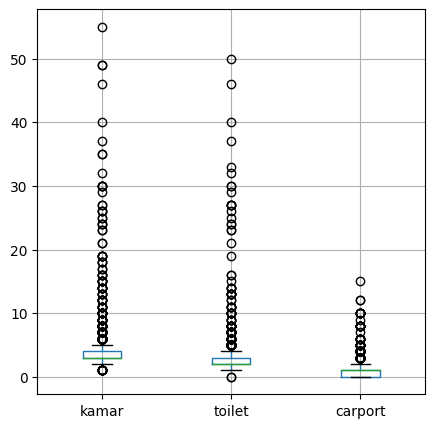

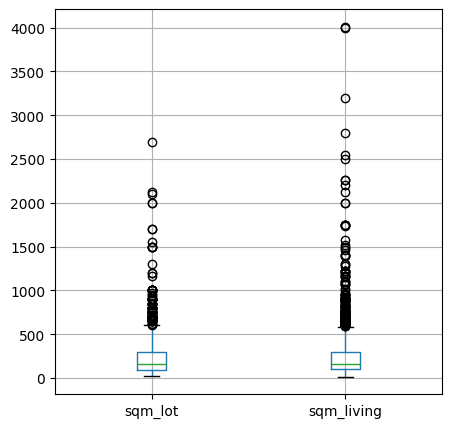

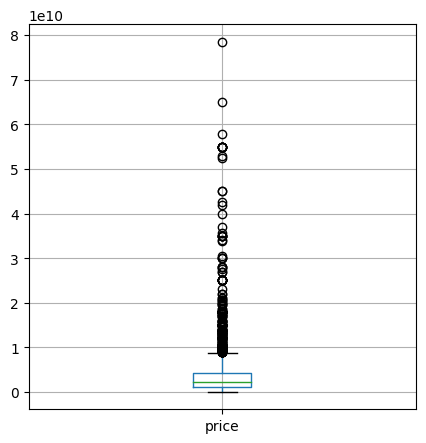

In [32]:
df2[['kamar', 'toilet', 'carport']].boxplot(figsize=(5,5))
plt.show()
df2[['sqm_lot', 'sqm_living']].boxplot(figsize=(5,5))
plt.show()
df2[['price']].boxplot(figsize=(5,5))
plt.show()

From the graph, we can see so many outliers in our data. So we need to do outliers removal.
We can use Interquartile Range Method or Standard Deviation Method.
To choose what we will use, first, we must see the data.
If we have normal data (the distribution of values is Gaussian or Gaussian-like), we can use STD Method, but if we do not have normal data, we can use the IQR method.

array([[<AxesSubplot: title={'center': 'kamar'}>,
        <AxesSubplot: title={'center': 'toilet'}>],
       [<AxesSubplot: title={'center': 'carport'}>,
        <AxesSubplot: title={'center': 'sqm_lot'}>],
       [<AxesSubplot: title={'center': 'sqm_living'}>,
        <AxesSubplot: title={'center': 'price'}>]], dtype=object)

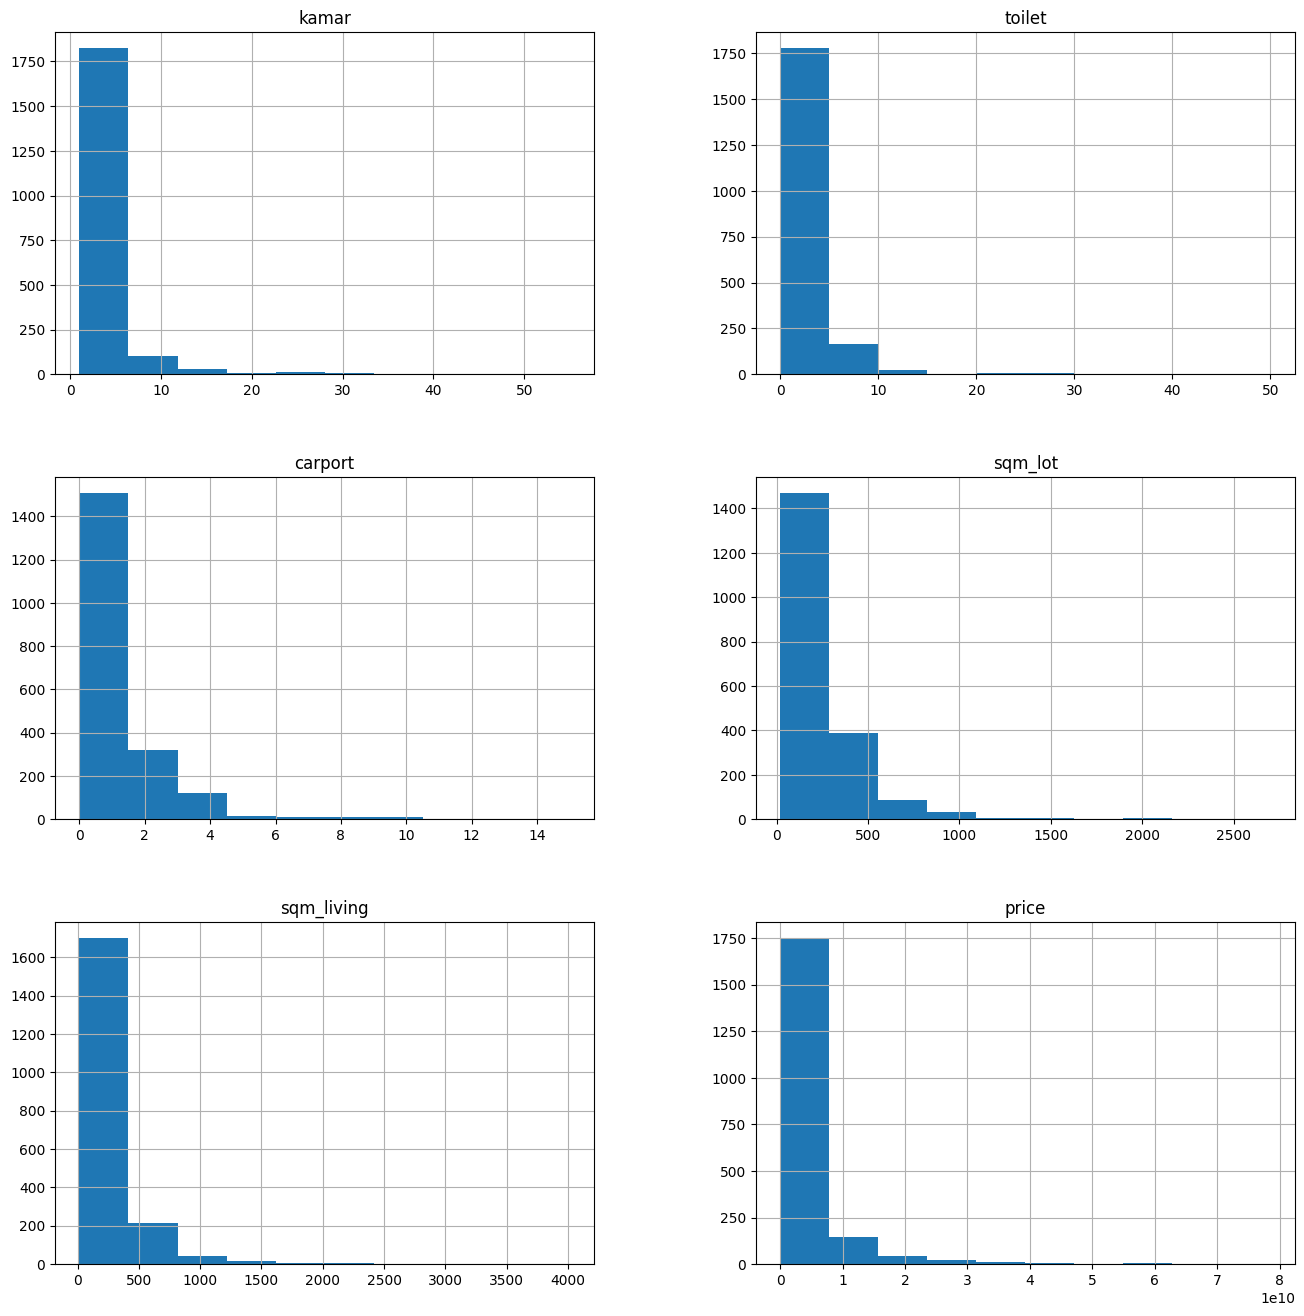

In [13]:
df2[['kamar', 'toilet', 'carport', 'sqm_lot', 'sqm_living', 'price']].hist(figsize=(16,16))

From the graph, we can see that the data looks more skewed rather than having a normal distribution.
Then we can use the IQR method to handle outliers for our data.

In [16]:
dfx = df2.copy()

def outliersremoveiqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    return df[(df[feature]<lower_limit)|(df[feature]>upper_limit)].index

# def outliersremovezscore(df, feature):
#     upperlimit = df[feature].mean()+df[feature].std()*3
#     lowerlimit = df[feature].mean()-df[feature].std()*3
#     return df[(df[feature]>upperlimit) | (df[feature]<lowerlimit)].index

for i in ['kamar', 'toilet', 'carport', 'sqm_lot', 'sqm_living', 'price']:
    dfx = dfx.drop(outliersremoveiqr(dfx, i), axis='index')
    

dfx

,namaproduk,harga,daerah,kamar,toilet,carport,luastanah,luasbangunan,city,subdistrict,sqm_living,sqm_lot,price
1,Rumah murah bandung shm bebas banjir,Rp 274 Juta,"Bandung Kota, Bandung",2,1,1,72 m²,50 m²,Bandung,Bandung Kota,72,50,2.740000e+08
2,Rumah Cantik Siap Huni Dalam Komplek Antapani ...,"Rp 2,2 Miliar","Antapani, Bandung",4,3,2,280 m²,214 m²,Bandung,Antapani,280,214,2.200000e+09
5,"Rumah Modern Minimalis di sayap Mekar Wangi , ...","Rp 1,1 Miliar","Mekar Wangi, Bandung",3,2,1,55 m²,82 m²,Bandung,Mekar Wangi,55,82,1.100000e+09
7,Dijual Rumah Baru Cluster Terbaru Tengah Kota ...,"Rp 1,1 Miliar","Leuwi Panjang, Bandung",3,2,0,55 m²,82 m²,Bandung,Leuwi Panjang,55,82,1.100000e+09
8,Rumah mewah dekat kota,Rp 636 Juta,"Kopo, Bandung",2,2,1,98 m²,70 m²,Bandung,Kopo,98,70,6.360000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,for Sale Rumah di Kbp Tatar Lokacitra,"Rp 4,5 Miliar","Padalarang, Bandung",5,3,0,162 m²,215 m²,Bandung,Padalarang,162,215,4.500000e+09
1985,Dijual Rumah Huk di Bahagia Permai Margacinta ...,"Rp 2,5 Miliar","Buah Batu, Bandung",4,3,0,289 m²,180 m²,Bandung,Buah Batu,289,180,2.500000e+09
1986,Rumah Baru Nan Cantik Type Dayana di Summareco...,"Rp 1,6 Miliar","Soekarno Hatta, Bandung",2,2,0,108 m²,70 m²,Bandung,Soekarno Hatta,108,70,1.600000e+09
1987,Dijual Rumah Permata Buah Batu Seberang Telkom...,"Rp 1,2 Miliar","Buah Batu, Bandung",3,3,0,100 m²,130 m²,Bandung,Buah Batu,100,130,1.200000e+09


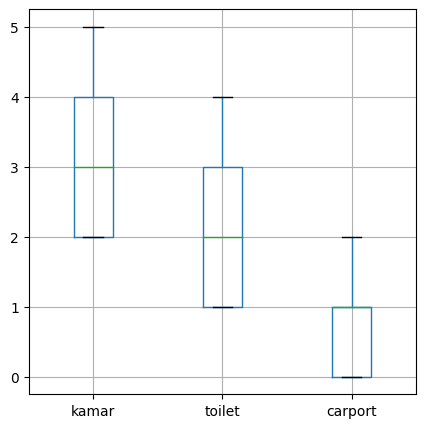

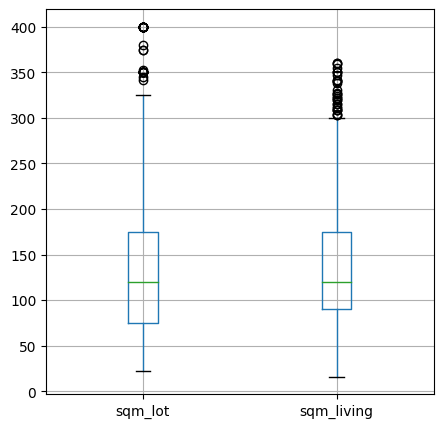

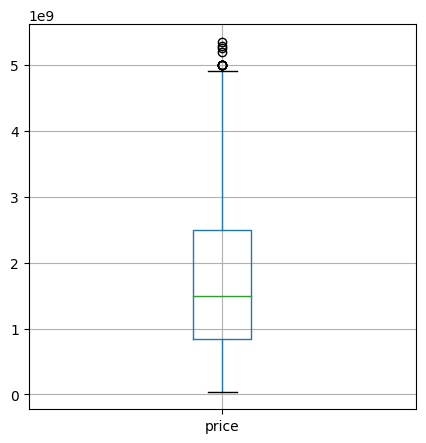

In [33]:
dfx[['kamar', 'toilet', 'carport']].boxplot(figsize=(5,5))
plt.show()
dfx[['sqm_lot', 'sqm_living']].boxplot(figsize=(5,5))
plt.show()
dfx[['price']].boxplot(figsize=(5,5))
plt.show()

We can see that our data outliers have been got removed

In [34]:
df2 = dfx.copy()

array([[<AxesSubplot: title={'center': 'kamar'}>,
        <AxesSubplot: title={'center': 'toilet'}>],
       [<AxesSubplot: title={'center': 'carport'}>,
        <AxesSubplot: title={'center': 'sqm_living'}>],
       [<AxesSubplot: title={'center': 'sqm_lot'}>,
        <AxesSubplot: title={'center': 'price'}>]], dtype=object)

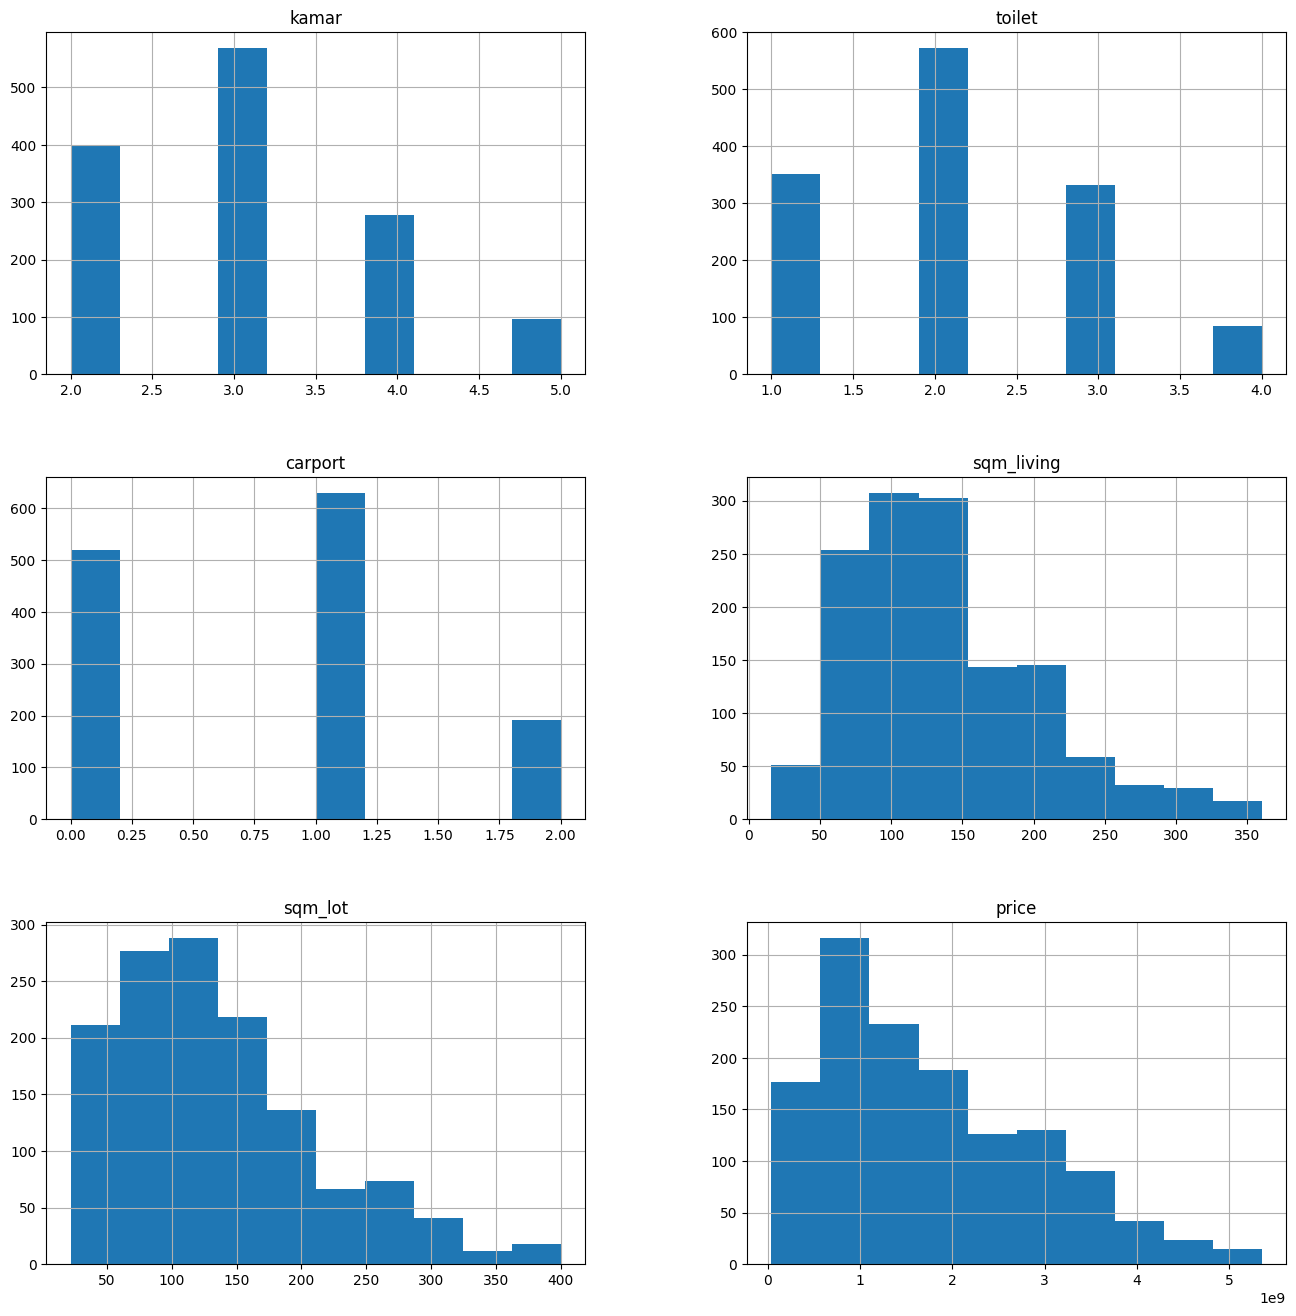

In [35]:
import seaborn as sns
# diamonds = sns.load_dataset(df2['kamar'].astype(int))
# diamonds.distplot(figsize=(16,16))

numerical_features = [features for features in df2.columns if df2[features].dtype!='object']
df_temp = df2[numerical_features]
df_temp.hist(figsize=(16,16))

Our data has a skewed model, so we need to do the normalization when trying to train the data. Because it is skew, we can use Power Transformer method to make data more normal (Gaussian).

We need to ensure that each region (daerah) appeared on the data at least 1% of the total data to prevent undersampling in particular regions when doing modeling and prediction.

In [ ]:
# data = df2.copy()
# row = data[data['harga_new']<200000000].index

# data.drop(row, axis='index', inplace=True)

# df2 = data.copy()

In [36]:
data = df2.copy()
df_temp = df2['daerah'].value_counts()
for i,j in data['daerah'].iteritems():
    if(df_temp[j]<0.01*df2.shape[0]):
#     if(df_temp[j]<30):
        data.drop(i, axis = 0, inplace=True)

data

C:\Users\COMPUTER\AppData\Local\Temp\ipykernel_2148\4219745365.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i,j in data['daerah'].iteritems():


,namaproduk,harga,daerah,kamar,toilet,carport,luastanah,luasbangunan,city,subdistrict,sqm_living,sqm_lot,price
1,Rumah murah bandung shm bebas banjir,Rp 274 Juta,"Bandung Kota, Bandung",2,1,1,72 m²,50 m²,Bandung,Bandung Kota,72,50,2.740000e+08
2,Rumah Cantik Siap Huni Dalam Komplek Antapani ...,"Rp 2,2 Miliar","Antapani, Bandung",4,3,2,280 m²,214 m²,Bandung,Antapani,280,214,2.200000e+09
5,"Rumah Modern Minimalis di sayap Mekar Wangi , ...","Rp 1,1 Miliar","Mekar Wangi, Bandung",3,2,1,55 m²,82 m²,Bandung,Mekar Wangi,55,82,1.100000e+09
8,Rumah mewah dekat kota,Rp 636 Juta,"Kopo, Bandung",2,2,1,98 m²,70 m²,Bandung,Kopo,98,70,6.360000e+08
15,Dijual Rumah Cantik Full Furnish Singgasana Pr...,"Rp 2,29 Miliar","Mekar Wangi, Bandung",3,2,1,125 m²,110 m²,Bandung,Mekar Wangi,125,110,2.290000e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,Rumah Siap Huni Tengah Kota Area Rajamantri Bu...,"Rp 3,8 Miliar","Turangga, Bandung",3,1,0,240 m²,300 m²,Bandung,Turangga,240,300,3.800000e+09
1984,for Sale Rumah di Kbp Tatar Lokacitra,"Rp 4,5 Miliar","Padalarang, Bandung",5,3,0,162 m²,215 m²,Bandung,Padalarang,162,215,4.500000e+09
1985,Dijual Rumah Huk di Bahagia Permai Margacinta ...,"Rp 2,5 Miliar","Buah Batu, Bandung",4,3,0,289 m²,180 m²,Bandung,Buah Batu,289,180,2.500000e+09
1986,Rumah Baru Nan Cantik Type Dayana di Summareco...,"Rp 1,6 Miliar","Soekarno Hatta, Bandung",2,2,0,108 m²,70 m²,Bandung,Soekarno Hatta,108,70,1.600000e+09


In [38]:
df3 = data.copy()

In [130]:
df3[df3['subdistrict'] == "Bandung Kota"]['price'].mean()

1209761904.7619047

# Plotting Data

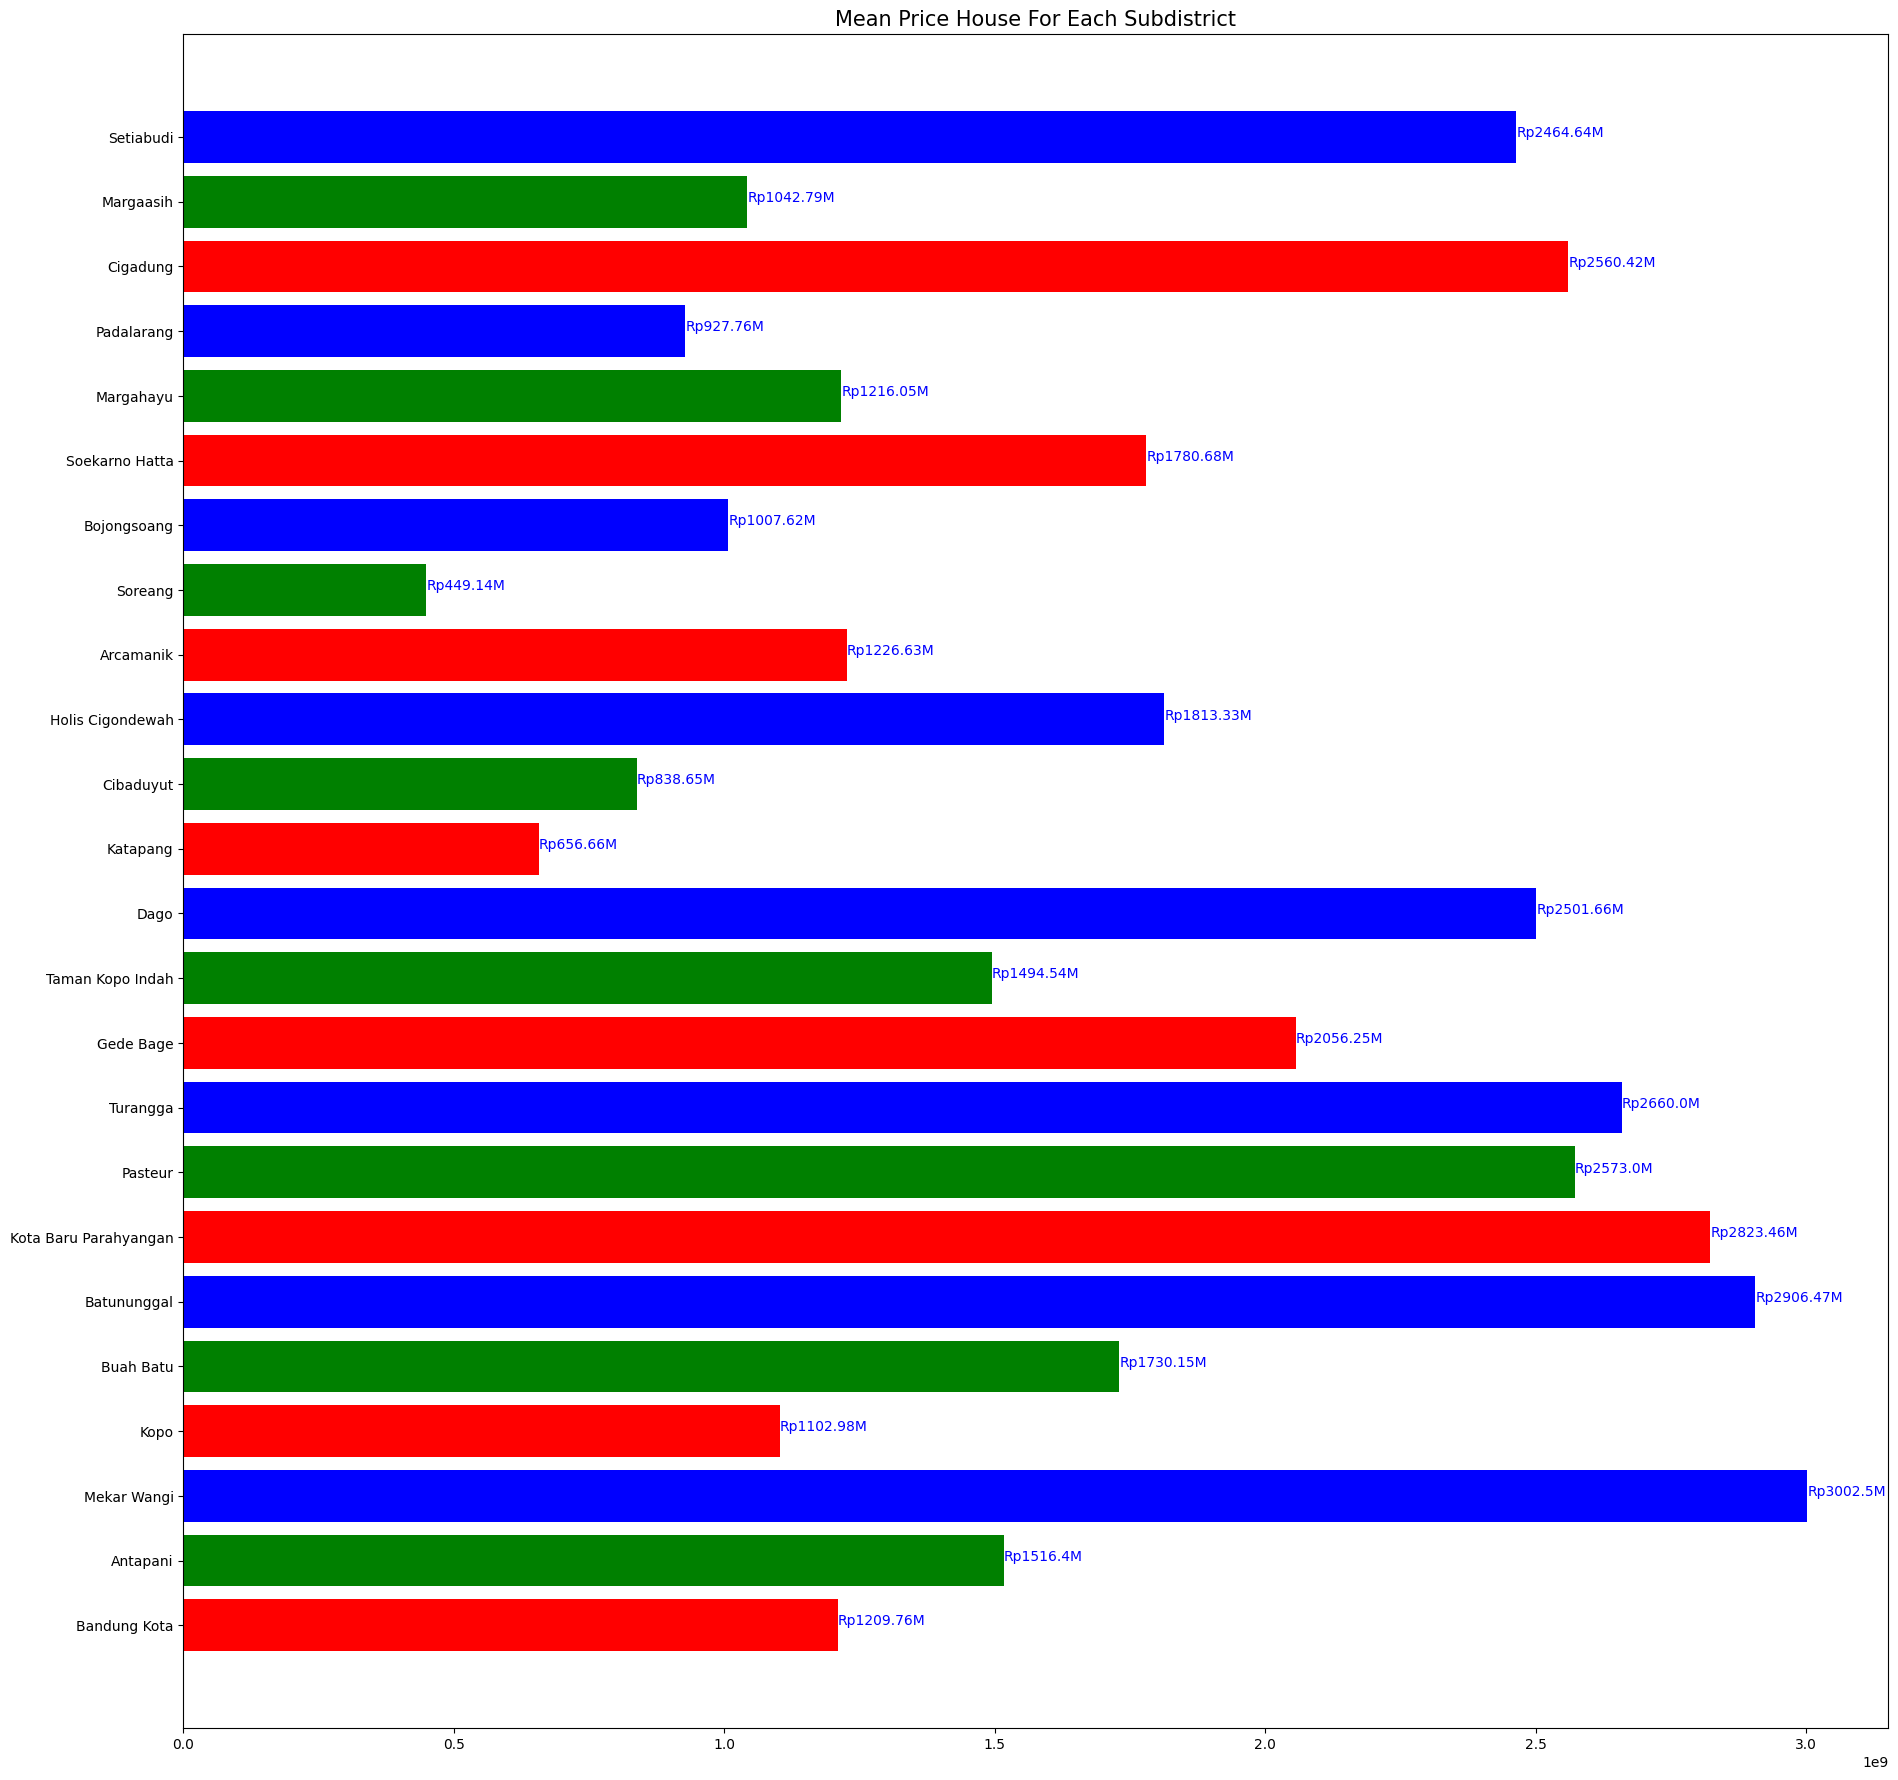

In [263]:
data = df3.copy()

unique_subdist = data['subdistrict'].unique()


subdist_with_avgprice = {}

for i,j in enumerate(unique_subdist):
    subdist_with_avgprice[j] = [data[data['subdistrict'] == unique_subdist[i]]['price'].mean()]
    

    
fig, ax = plt.subplots(figsize=[22,22])


for i, v in enumerate(dx.iloc[0]):
    a = v/1000000
    ax.text(v, i, ('Rp' + str(round(a,2)) + 'M'), color='blue')

ax.set_title('Mean Price House For Each Subdistrict', fontsize=15)
ax.barh(dx.columns, dx.iloc[0], color = ['r', 'g', 'b'], label='sasdasdad')
plt.show()


From the graph, we can see that subdistrict Mekar Wangi has the most highest average price house in the dataset.
Besides, we can also see that subdistrict Soreang has the tiniest average price house in the dataset.

# Modelling The Data

In [275]:
df4 = df3.copy()
df4['daerah'].value_counts(), df4['daerah'].value_counts().count()

(Kota Baru Parahyangan, Bandung    130
 Taman Kopo Indah, Bandung          98
 Arcamanik, Bandung                 65
 Bandung Kota, Bandung              63
 Buah Batu, Bandung                 62
 Antapani, Bandung                  60
 Mekar Wangi, Bandung               52
 Kopo, Bandung                      50
 Holis Cigondewah, Bandung          36
 Batununggal, Bandung               34
 Turangga, Bandung                  32
 Gede Bage, Bandung                 32
 Cibaduyut, Bandung                 31
 Katapang, Bandung                  29
 Bojongsoang, Bandung               24
 Cigadung, Bandung                  24
 Dago, Bandung                      22
 Soekarno Hatta, Bandung            22
 Pasteur, Bandung                   20
 Margahayu, Bandung                 19
 Padalarang, Bandung                17
 Soreang, Bandung                   14
 Margaasih, Bandung                 14
 Setiabudi, Bandung                 14
 Name: daerah, dtype: int64,
 24)

In [287]:
df4['price'].describe()

count          964.00
mean    1830526452.28
std     1147924034.90
min       79500000.00
25%      915000000.00
50%     1600000000.00
75%     2650000000.00
max     5350000000.00
Name: price, dtype: float64

There are around 24 subdistricts that will take place in our modeling.

In [276]:
df5 = df4.copy()

Computer does not understand string when it comes to modeling or training the data. Then we need to encode the string value so it can be get trained.

In [360]:
encoding = pd.get_dummies(df5.daerah)
encoding

,"Antapani, Bandung","Arcamanik, Bandung","Bandung Kota, Bandung","Batununggal, Bandung","Bojongsoang, Bandung","Buah Batu, Bandung","Cibaduyut, Bandung","Cigadung, Bandung","Dago, Bandung","Gede Bage, Bandung",...,"Margaasih, Bandung","Margahayu, Bandung","Mekar Wangi, Bandung","Padalarang, Bandung","Pasteur, Bandung","Setiabudi, Bandung","Soekarno Hatta, Bandung","Soreang, Bandung","Taman Kopo Indah, Bandung","Turangga, Bandung"
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1984,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1985,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [278]:
df6 = pd.concat([df5, encoding], axis = 'columns').drop('daerah',axis = 'columns')
df6.head()

,namaproduk,harga,kamar,toilet,carport,luastanah,luasbangunan,city,subdistrict,sqm_living,...,"Margaasih, Bandung","Margahayu, Bandung","Mekar Wangi, Bandung","Padalarang, Bandung","Pasteur, Bandung","Setiabudi, Bandung","Soekarno Hatta, Bandung","Soreang, Bandung","Taman Kopo Indah, Bandung","Turangga, Bandung"
1,Rumah murah bandung shm bebas banjir,Rp 274 Juta,2,1,1,72 m²,50 m²,Bandung,Bandung Kota,72,...,0,0,0,0,0,0,0,0,0,0
2,Rumah Cantik Siap Huni Dalam Komplek Antapani ...,"Rp 2,2 Miliar",4,3,2,280 m²,214 m²,Bandung,Antapani,280,...,0,0,0,0,0,0,0,0,0,0
5,"Rumah Modern Minimalis di sayap Mekar Wangi , ...","Rp 1,1 Miliar",3,2,1,55 m²,82 m²,Bandung,Mekar Wangi,55,...,0,0,1,0,0,0,0,0,0,0
8,Rumah mewah dekat kota,Rp 636 Juta,2,2,1,98 m²,70 m²,Bandung,Kopo,98,...,0,0,0,0,0,0,0,0,0,0
15,Dijual Rumah Cantik Full Furnish Singgasana Pr...,"Rp 2,29 Miliar",3,2,1,125 m²,110 m²,Bandung,Mekar Wangi,125,...,0,0,1,0,0,0,0,0,0,0


In [280]:
df7 = df6.drop(['namaproduk', 'harga', 'luastanah', 'luasbangunan', 'city', 'subdistrict'], axis ='columns')

df7

,kamar,toilet,carport,sqm_living,sqm_lot,price,"Antapani, Bandung","Arcamanik, Bandung","Bandung Kota, Bandung","Batununggal, Bandung",...,"Margaasih, Bandung","Margahayu, Bandung","Mekar Wangi, Bandung","Padalarang, Bandung","Pasteur, Bandung","Setiabudi, Bandung","Soekarno Hatta, Bandung","Soreang, Bandung","Taman Kopo Indah, Bandung","Turangga, Bandung"
1,2,1,1,72,50,2.740000e+08,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,4,3,2,280,214,2.200000e+09,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3,2,1,55,82,1.100000e+09,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,2,2,1,98,70,6.360000e+08,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,3,2,1,125,110,2.290000e+09,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,3,1,0,240,300,3.800000e+09,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1984,5,3,0,162,215,4.500000e+09,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1985,4,3,0,289,180,2.500000e+09,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1986,2,2,0,108,70,1.600000e+09,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# MODELLING

Remember that Carport feature will exclude from the modeling because it gives a very low correlation with the price feature

In [282]:
X = df7.drop(['price', 'carport'], axis='columns')
X

,kamar,toilet,sqm_living,sqm_lot,"Antapani, Bandung","Arcamanik, Bandung","Bandung Kota, Bandung","Batununggal, Bandung","Bojongsoang, Bandung","Buah Batu, Bandung",...,"Margaasih, Bandung","Margahayu, Bandung","Mekar Wangi, Bandung","Padalarang, Bandung","Pasteur, Bandung","Setiabudi, Bandung","Soekarno Hatta, Bandung","Soreang, Bandung","Taman Kopo Indah, Bandung","Turangga, Bandung"
1,2,1,72,50,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,3,280,214,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3,2,55,82,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,2,2,98,70,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,3,2,125,110,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,3,1,240,300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1984,5,3,162,215,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1985,4,3,289,180,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1986,2,2,108,70,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [284]:
y = df7['price']
y

1       2.740000e+08
2       2.200000e+09
5       1.100000e+09
8       6.360000e+08
15      2.290000e+09
            ...     
1983    3.800000e+09
1984    4.500000e+09
1985    2.500000e+09
1986    1.600000e+09
1987    1.200000e+09
Name: price, Length: 964, dtype: float64

# ML Model

We are going to use lazypredict to get a quick insight into what model we can use and do the hyperparameter tuning

Remember that we will use Power Transformation to make data more normal (Gaussian).

In [320]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

from lazypredict.Supervised import LazyRegressor
clf = LazyRegressor(verbose = 0,
                     ignore_warnings = True,
                     custom_metric = None,
                     predictions = False,
                     random_state = 0
                   )

pt = PowerTransformer()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify = df4['daerah'], random_state=42)

models, predictions = clf.fit(pt.fit_transform(X_train), pt.transform(X_test) ,y_train , y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:13<00:00,  3.01it/s]


In [321]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.75,0.79,539100372.77,1.36
LGBMRegressor,0.75,0.79,545000366.84,0.14
ExtraTreesRegressor,0.74,0.78,557218219.24,0.30
RandomForestRegressor,0.73,0.77,560174068.50,0.30
GradientBoostingRegressor,0.72,0.76,575823106.71,0.08
BaggingRegressor,0.71,0.75,585342351.89,0.05
LarsCV,0.71,0.75,587587765.50,0.04
LassoLarsCV,0.71,0.75,587587765.50,0.03
LassoCV,0.71,0.75,587610444.83,0.07


From the results, we can get R and RMSE for almost every possible modeling method to do regression on our data.
We will take the best three models (ExtraTrees, LGBM, and HistGradientBoosting) to do hyperparameter tuning so we can get (hopefully) the best of the best model we can use to train our data.

In [344]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
import lightgbm as lgb
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

lgbm = lgb.LGBMRegressor()
extratrees = ExtraTreesRegressor()
histgradient = HistGradientBoostingRegressor()

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'lgbmregressor': {
        'model': lgbm,
        'params':{
        'lgbmregressor__boosting': ['gbdt', 'dart', 'rf'],
        'lgbmregressor__num_leaves':[31, 91, 151],
        'lgbmregressor__learning_rate': [0.1, 0.05, 0.5],
        'lgbmregressor__n_estimators': [100,300,500]
        }
    },
    'histgradientboostingregressor': {
        'model': histgradient,
        'params':{
        'histgradientboostingregressor__loss': ['squared_error', 'absolute_error', 'poisson', 'quantile'],
        'histgradientboostingregressor__max_iter': [100,300,500],
        'histgradientboostingregressor__learning_rate': [0.1, 0.05, 0.5]
        }
    },
    'extratrees': {
        'model': extratrees,
        'params':{
        'extratreesregressor__n_estimators': [100,200,300],
        'extratreesregressor__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        'extratreesregressor__min_samples_leaf':[1,3,5],
        'extratreesregressor__random_state': [0,42]
        }
    }
}

In [345]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
scores = []
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

pt = PowerTransformer()


for algo_name, config in hyperparameter_grid.items():
        pl = make_pipeline(PowerTransformer(), config['model'])
        random_cv =  RandomizedSearchCV(pl, config['params'], cv=5, scoring = 'neg_mean_squared_error', return_train_score=True)
        random_cv.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': random_cv.best_score_,
            'best_params': random_cv.best_params_
        })
        print(pd.DataFrame(scores,columns=['model','best_score','best_params']))
        print("=========")

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] boosting is set=dart, boosting_type=gbdt will be ignored. Current value: boosting=dart
[LightGBM] [Warning] boostin

In [346]:
scores

[{'model': 'lgbmregressor',
  'best_score': -3.100742659535136e+17,
  'best_params': {'lgbmregressor__num_leaves': 31,
   'lgbmregressor__n_estimators': 300,
   'lgbmregressor__learning_rate': 0.1,
   'lgbmregressor__boosting': 'dart'}},
 {'model': 'histgradientboostingregressor',
  'best_score': -3.120228821864374e+17,
  'best_params': {'histgradientboostingregressor__max_iter': 100,
   'histgradientboostingregressor__loss': 'squared_error',
   'histgradientboostingregressor__learning_rate': 0.05}},
 {'model': 'extratrees',
  'best_score': -2.7761926500336966e+17,
  'best_params': {'extratreesregressor__random_state': 42,
   'extratreesregressor__n_estimators': 300,
   'extratreesregressor__min_samples_leaf': 3,
   'extratreesregressor__criterion': 'poisson'}}]

From the scores above, we can say that the extra trees model is most likely the best model that we can use as our training model for our dataset

In [347]:
from sklearn.ensemble import ExtraTreesRegressor
extratrees = ExtraTreesRegressor(random_state=42, n_estimators=300, min_samples_leaf=3, criterion='poisson')

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
pt = PowerTransformer()

X_train_scaled = pt.fit_transform(X_train)

X_test_scaled = pt.transform(X_test)

extratrees.fit(X_train_scaled, y_train)
rms = mean_squared_error(y_test, extratrees.predict(X_test_scaled), squared=False)
rms

514949355.43951213

Let us make a simple application that can get input from a user to predict house prices based on his criteria

In [350]:
def predict_price(location,bedroom,toilet, sqm_lot, sqm_living):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bedroom
    x[1] = toilet
    x[2] = sqm_lot
    x[3] = sqm_living
    if loc_index >= 0:
        x[loc_index] = 1
    x = pt.transform(np.array(x).reshape(1,len(x)))
#     X_nomial = poly.fit_transform([x])
    
#     return np.array(X_nomial).shape
#     return lin2.predict(X_nomial)
    predict = extratrees.predict(x)[0]
    return predict



In [359]:
predict_price("Bandung Kota, Bandung",2,1,120,160)

1699102699.7539494

In [358]:
from ipywidgets import widgets
from IPython.display import display

dfwidget = df4.copy()

# def printdaerah(kota,kecamatan, kamar, toilet, carport, luastanah, luasbangunan):
#     reg = "{}, {}".format(kecamatan, kota)
#     pricepred = predict_price(reg, kamar, toilet, carport, luastanah, luasbangunan)
#     currencypr = 'Rp{:,.2f}'.format(pricepred)
#     print("House price in {} with {} bedroom(s), {} toilet(s), {} carport(s), land area {} m², and building area {}m² around: \n{}".format(reg, kamar, toilet, carport, luastanah, luasbangunan, currencypr))


def printfinalprediction(city,subdistrict, bedroom, toilet, sqm_lot, sqm_living):
    reg = "{}, {}".format(subdistrict, city)
    pricepred = predict_price(reg, bedroom, toilet, sqm_lot, sqm_living)
    currencypr = 'Rp{:,.2f}'.format(pricepred)
    print("House price in {} with {} bedroom(s), {} toilet(s), land area {} m², and building area {}m² around: \n{}".format(reg, bedroom, toilet, sqm_lot, sqm_living, currencypr))


# def select_kecamatan(kota):
#     cityW.options = dfwidget[dfwidget['kota/kabupaten']==kota]["kecamatan"].unique()

def select_subdisctrict(city):
    cityW.options = dfwidget[dfwidget['city']==city]["subdistrict"].unique()


bedroom = widgets.IntText(
    value=7,
    description='Bedroom:',
    disabled=False
)

toilet = widgets.IntText(
    value=7,
    description='Toilet:',
    disabled=False
)


sqm_lot = widgets.IntText(
    value=7,
    description='Lot Area(m²):',
    disabled=False
)

sqm_living = widgets.IntText(
    value=7,
    description='Living Area(m²):',
    disabled=False
)
    
scW = widgets.Select(options=dfwidget["city"].unique())
init = scW.value
cityW = widgets.Select(options=dfwidget[dfwidget['city']==init]["subdistrict"].unique())
j = widgets.interactive(printfinalprediction, subdistrict=cityW, city=scW, bedroom=bedroom, toilet=toilet, sqm_lot=sqm_lot, sqm_living=sqm_living)
i = widgets.interactive(select_subdisctrict, city=scW)
# display(i)

display(j)

interactive(children=(Select(description='city', options=('Bandung',), value='Bandung'), Select(description='s…

# THE END

This is the end of Bandung House Price Prediction Program.

There are so many lacks of my model. First, it does not give a good RMSE (around 500 million rupiahs). One of the reasons is that our dataset has minimal features (only six features). We can add many other features to boost the model, i.e., furnished/unfurnished house, built year of the house, total floors in the house, position of the house, and many more.
Second, it is limited only to 24 subdistricts, while Bandung has subdistricts more than that.

In the future, I hope I can improve the model to predict house prices in Bandung more accurately.

If you have any questions or suggestions, feel free to contact me by benitobosco8@gmail.com